In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('treadmil-users.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


#### Univariate Analysis

In [6]:
cols = df.columns
cols

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [8]:
for i in cols:
    print(i,':',*df[i].unique())

Product : TM195 TM498 TM798
Age : 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 46 47 50 45 48 42
Gender : Male Female
Education : 14 15 12 13 16 18 20 21
MaritalStatus : Single Partnered
Usage : 3 2 4 5 6 7
Fitness : 4 3 2 1 5
Income : 29562 31836 30699 32973 35247 37521 36384 38658 40932 34110 39795 42069 44343 45480 46617 48891 53439 43206 52302 51165 50028 54576 68220 55713 60261 67083 56850 59124 61398 57987 64809 47754 65220 62535 48658 54781 48556 58516 53536 61006 57271 52291 49801 62251 64741 70966 75946 74701 69721 83416 88396 90886 92131 77191 52290 85906 103336 99601 89641 95866 104581 95508
Miles : 112 75 66 85 47 141 103 94 113 38 188 56 132 169 64 53 106 95 212 42 127 74 170 21 120 200 140 100 80 160 180 240 150 300 280 260 360


In [9]:
df.apply(lambda x:x.unique()) # the axis=0

Product                                      [TM195, TM498, TM798]
Age              [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...
Gender                                              [Male, Female]
Education                         [14, 15, 12, 13, 16, 18, 20, 21]
MaritalStatus                                  [Single, Partnered]
Usage                                           [3, 2, 4, 5, 6, 7]
Fitness                                            [4, 3, 2, 1, 5]
Income           [29562, 31836, 30699, 32973, 35247, 37521, 363...
Miles            [112, 75, 66, 85, 47, 141, 103, 94, 113, 38, 1...
dtype: object

In [10]:
for i in ['Product','Gender','MaritalStatus','Fitness','Age']:
    print(i)
    print(df[i].value_counts())
    print('-'*50)

Product
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
--------------------------------------------------
Gender
Male      104
Female     76
Name: Gender, dtype: int64
--------------------------------------------------
MaritalStatus
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Fitness
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
--------------------------------------------------
Age
25    25
23    18
26    12
24    12
28     9
33     8
35     8
30     7
38     7
22     7
21     7
27     7
34     6
31     6
29     6
40     5
20     5
32     4
19     4
37     2
45     2
48     2
47     2
50     1
36     1
39     1
41     1
42     1
43     1
44     1
46     1
18     1
Name: Age, dtype: int64
--------------------------------------------------


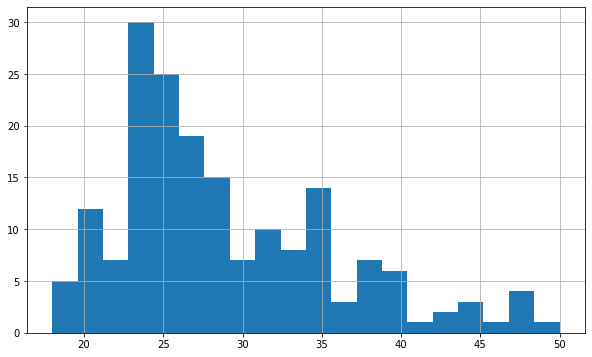

In [11]:
df['Age'].hist(bins=20,figsize=(10,6));

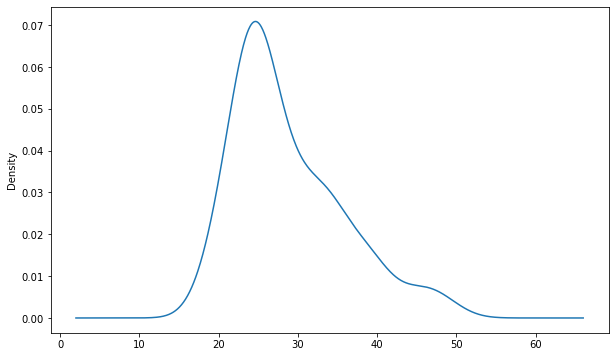

In [12]:
df['Age'].plot.kde(figsize=(10,6));

In [13]:
# Comparing on the basis of product
df.groupby('Product').describe().T

Product                 TM195         TM498          TM798
Age       count     80.000000     60.000000      40.000000
          mean      28.550000     28.900000      29.100000
          std        7.221452      6.645248       6.971738
          min       18.000000     19.000000      22.000000
          25%       23.000000     24.000000      24.750000
          50%       26.000000     26.000000      27.000000
          75%       33.000000     33.250000      30.250000
          max       50.000000     48.000000      48.000000
Education count     80.000000     60.000000      40.000000
          mean      15.037500     15.116667      17.325000
          std        1.216383      1.222552       1.639066
          min       12.000000     12.000000      14.000000
          25%       14.000000     14.000000      16.000000
          50%       16.000000     16.000000      18.000000
          75%       16.000000     16.000000      18.000000
          max       18.000000     18.000000      21.000000
Usage     count     80.000000     60.000000      40.000000
          mean       3.087500      3.066667       4.775000
          std        0.782624      0.799717       0.946993
          min        2.000000      2.000000       3.000000
          25%        3.000000      3.000000       4.000000
          50%        3.000000      3.000000       5.000000
          75%        4.000000      3.250000       5.000000
          max        5.000000      5.000000       7.000000
Fitness   count     80.000000     60.000000      40.000000
          mean       2.962500      2.900000       4.625000
          std        0.664540      0.629770       0.667467
          min        1.000000      1.000000       3.000000
          25%        3.000000      3.000000       4.000000
          50%        3.000000      3.000000       5.000000
          75%        3.000000      3.000000       5.000000
          max        5.000000      4.000000       5.000000
Income    count     80.000000     60.000000      40.000000
          mean   46418.025000  48973.650000   75441.575000
          std     9075.783190   8653.989388   18505.836720
          min    29562.000000  31836.000000   48556.000000
          25%    38658.000000  44911.500000   58204.750000
          50%    46617.000000  49459.500000   76568.500000
          75%    53439.000000  53439.000000   90886.000000
          max    68220.000000  67083.000000  104581.000000
Miles     count     80.000000     60.000000      40.000000
          mean      82.787500     87.933333     166.900000
          std       28.874102     33.263135      60.066544
          min       38.000000     21.000000      80.000000
          25%       66.000000     64.000000     120.000000
          50%       85.000000     85.000000     160.000000
          75%       94.000000    106.000000     200.000000
          max      188.000000    212.000000     360.000000

In [14]:
df.groupby('Gender').describe().T

Gender                 Female           Male
Age       count     76.000000     104.000000
          mean      28.565789      28.951923
          std        6.342104       7.377978
          min       19.000000      18.000000
          25%       24.000000      23.750000
          50%       26.500000      26.000000
          75%       33.000000      34.000000
          max       50.000000      48.000000
Education count     76.000000     104.000000
          mean      15.394737      15.701923
          std        1.442950       1.728571
          min       13.000000      12.000000
          25%       14.000000      14.000000
          50%       16.000000      16.000000
          75%       16.000000      16.000000
          max       21.000000      21.000000
Usage     count     76.000000     104.000000
          mean       3.184211       3.653846
          std        1.016012       1.095172
          min        2.000000       2.000000
          25%        2.000000       3.000000
          50%        3.000000       4.000000
          75%        4.000000       4.000000
          max        6.000000       7.000000
Fitness   count     76.000000     104.000000
          mean       3.026316       3.519231
          std        0.832245       0.994946
          min        1.000000       1.000000
          25%        3.000000       3.000000
          50%        3.000000       3.000000
          75%        3.000000       4.000000
          max        5.000000       5.000000
Income    count     76.000000     104.000000
          mean   49828.907895   56562.759615
          std    12557.690428   18421.687779
          min    30699.000000   29562.000000
          25%    42921.750000   45480.000000
          50%    47754.000000   52302.000000
          75%    53796.000000   61611.250000
          max    95866.000000  104581.000000
Miles     count     76.000000     104.000000
          mean      90.013158     112.826923
          std       44.782882      54.702451
          min       21.000000      42.000000
          25%       66.000000      85.000000
          50%       85.000000     100.000000
          75%      100.000000     141.000000
          max      280.000000     360.000000

In [15]:
df.groupby('MaritalStatus').describe().T

MaritalStatus        Partnered        Single
Age       count     107.000000     73.000000
          mean       29.887850     27.178082
          std         7.250670      6.167438
          min        19.000000     18.000000
          25%        25.000000     23.000000
          50%        28.000000     25.000000
          75%        34.500000     31.000000
          max        50.000000     45.000000
Education count     107.000000     73.000000
          mean       15.663551     15.438356
          std         1.523055      1.747906
          min        12.000000     12.000000
          25%        14.000000     14.000000
          50%        16.000000     16.000000
          75%        16.000000     16.000000
          max        21.000000     21.000000
Usage     count     107.000000     73.000000
          mean        3.448598      3.465753
          std         1.159324      0.972999
          min         2.000000      2.000000
          25%         3.000000      3.000000
          50%         3.000000      3.000000
          75%         4.000000      4.000000
          max         7.000000      6.000000
Fitness   count     107.000000     73.000000
          mean        3.271028      3.369863
          std         0.967101      0.950246
          min         1.000000      1.000000
          25%         3.000000      3.000000
          50%         3.000000      3.000000
          75%         4.000000      4.000000
          max         5.000000      5.000000
Income    count     107.000000     73.000000
          mean    55763.000000  50724.424658
          std     17499.657580  14534.129778
          min     30699.000000  29562.000000
          25%     45480.000000  40932.000000
          50%     52302.000000  48658.000000
          75%     61202.000000  54576.000000
          max    104581.000000  92131.000000
Miles     count     107.000000     73.000000
          mean      104.289720    101.589041
          std        59.230762     38.959678
          min        38.000000     21.000000
          25%        66.000000     75.000000
          50%        85.000000     95.000000
          75%       120.000000    113.000000
          max       360.000000    200.000000

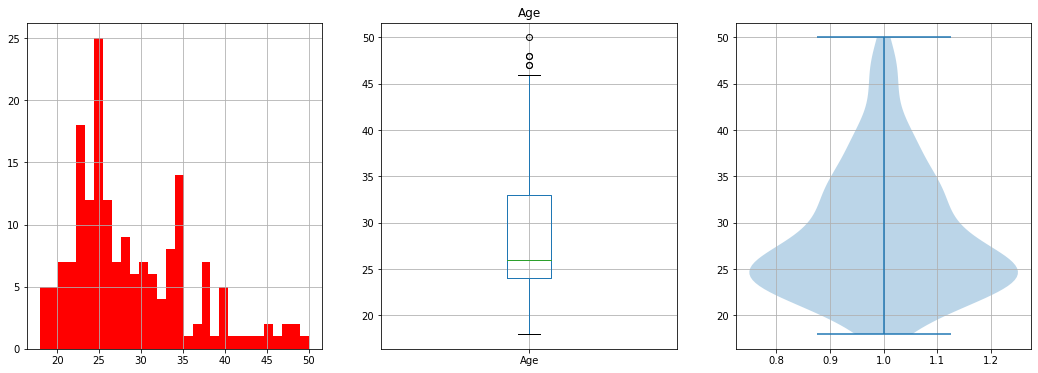

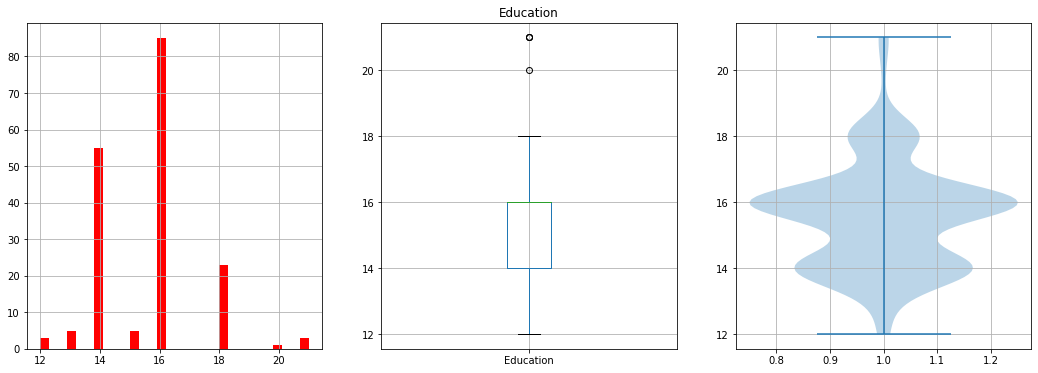

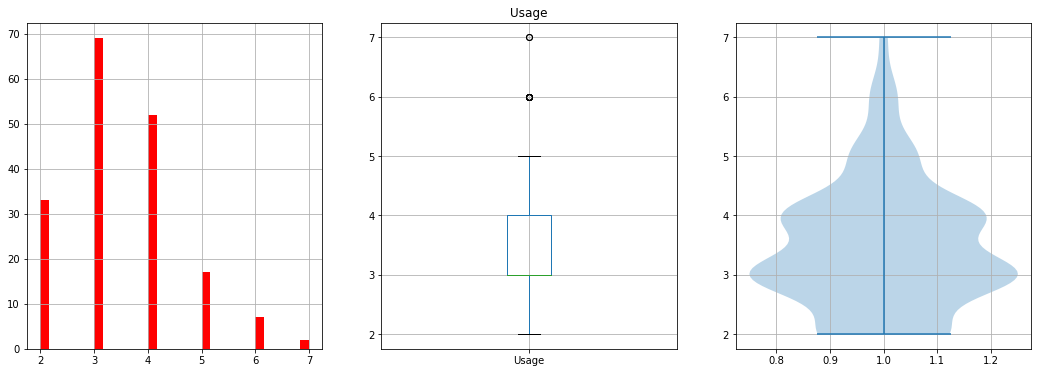

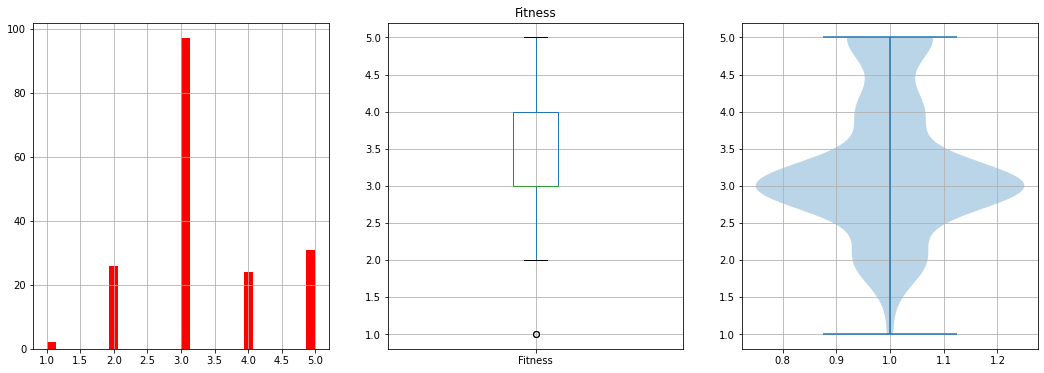

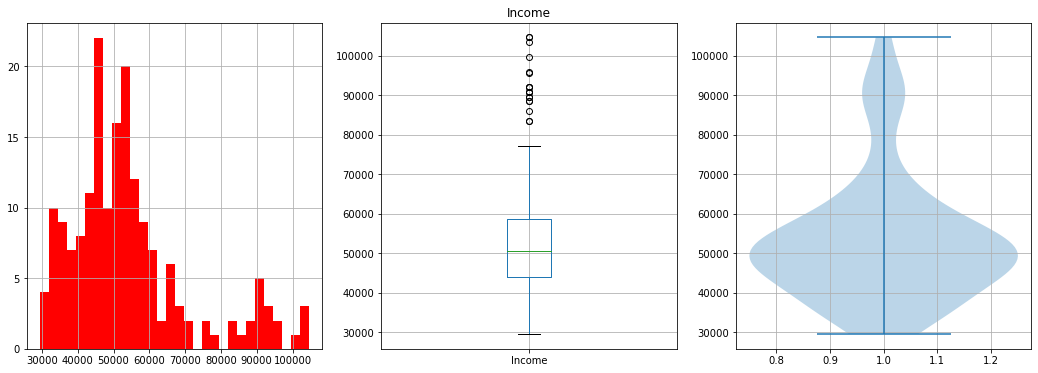

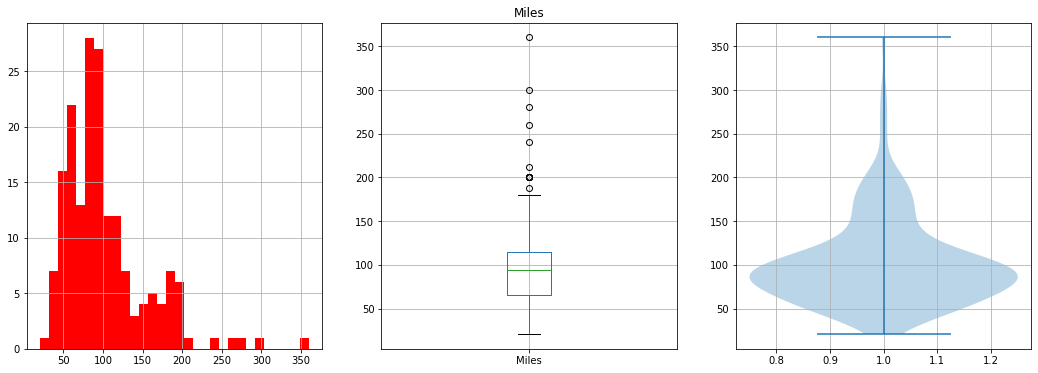

In [16]:
# Graphs
for i in ['Age','Education','Usage','Fitness','Income','Miles']:
    plt.figure(figsize=(18,6))
    
    plt.subplot(1,3,1)
    plt.hist(df[i],bins=30,color='red')
    plt.grid()

    plt.subplot(1,3,2)
    df[i].plot.box()
    plt.grid()
    plt.title(i)

    plt.subplot(1,3,3)
    plt.violinplot(df[i])
    plt.grid()

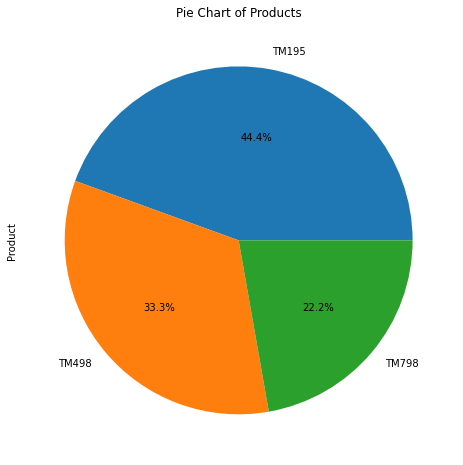

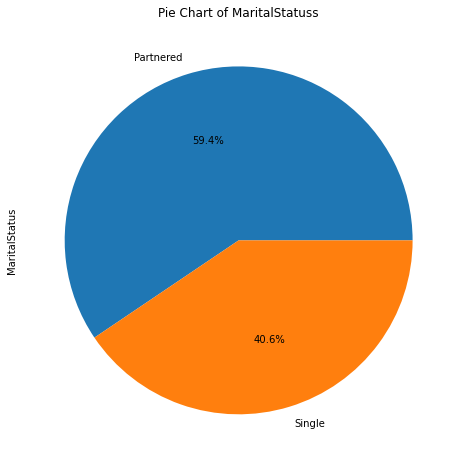

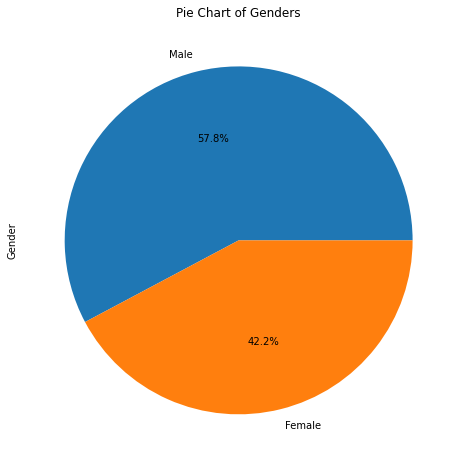

In [17]:
for i in ['Product','MaritalStatus','Gender']:
    df[i].value_counts().plot.pie(autopct='%.1f%%',figsize=(8,8))
    plt.title('Pie Chart of {}s'.format(i))
    plt.show()

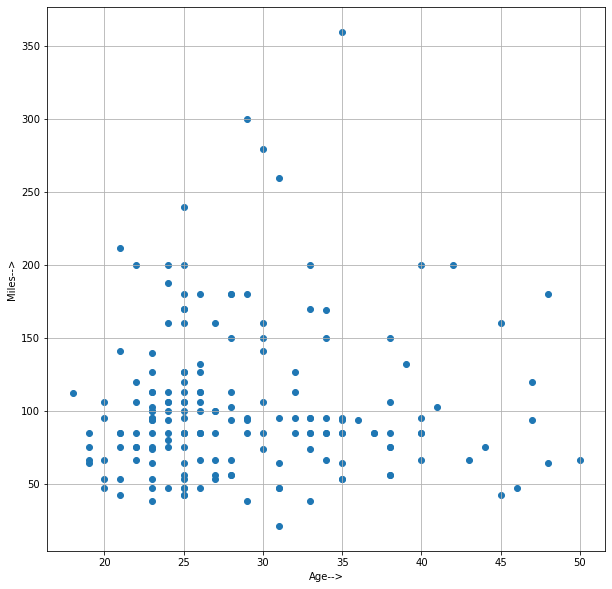

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(df['Age'],df['Miles'])
plt.xlabel('Age-->')
plt.ylabel('Miles-->')
plt.grid()

In [19]:
df['Miles'].max()

360

In [20]:
df.groupby('Product')['Gender'].count()

Product
TM195    80
TM498    60
TM798    40
Name: Gender, dtype: int64

In [21]:
df.groupby('Product')['Gender'].value_counts()

Product  Gender
TM195    Female    40
         Male      40
TM498    Male      31
         Female    29
TM798    Male      33
         Female     7
Name: Gender, dtype: int64

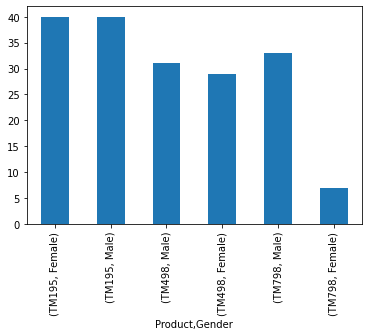

In [22]:
df.groupby('Product')['Gender'].value_counts().plot.bar();

In [23]:
pd.crosstab(df['Product'],df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


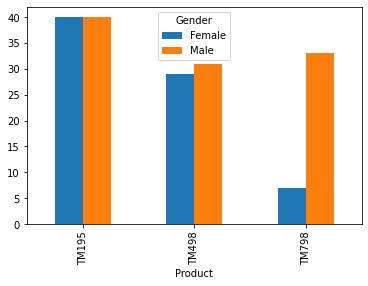

In [24]:
pd.crosstab(df['Product'],df['Gender']).plot.bar();

<AxesSubplot:xlabel='Product'>

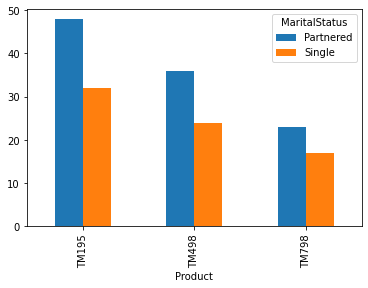

In [25]:
pd.crosstab(df['Product'],df['MaritalStatus']).plot.bar()